In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
SB = pd.read_csv('../../Clustering/resultados_clustering/SB.csv.csv')
ST = pd.read_csv('../../Clustering/resultados_clustering/SB.csv.csv')
AF = pd.read_csv('../../Clustering/resultados_clustering/SB.csv.csv')
RBBB = pd.read_csv('../../Clustering/resultados_clustering/SB.csv.csv')
LBBB = pd.read_csv('../../Clustering/resultados_clustering/SB.csv.csv')

excel_1 = pd.read_excel('../excel/parte_2_planilha_1.xlsx')
excel_2 = pd.read_excel('../excel/parte_2_planilha_2.xlsx')
excel_3 = pd.read_excel('../excel/parte_2_planilha_3.xlsx')
excel_4 = pd.read_excel('../excel/parte_2_planilha_4.xlsx')

excel_combined = pd.concat([excel_1, excel_2, excel_3, excel_4], axis=0, ignore_index=True)
excel_combined = excel_combined.fillna(np.nan)

#excel_combined['borderline'] = excel_combined['borderline'].fillna(False) 
excel_combined['borderline'] = excel_combined['borderline'].replace({'Não': False, 'Sim': True})
#excel_combined['comentario'] = excel_combined['comentario'].fillna(False) 

excel_combined.to_csv('../excel/parte_2_excel_combined.csv', index=False)

In [4]:
selected_columns = ['exam_id', 'label', 'normal_ecg', 'tipo',
                    'silhouette_score', 'doenca', 'borderline', 'comentario']

SB_merged = pd.merge(SB, excel_combined, on='exam_id', how='inner')[selected_columns].sort_values(by=['label', 'tipo'])
ST_merged = pd.merge(ST, excel_combined, on='exam_id', how='inner')[selected_columns].sort_values(by=['label', 'tipo'])
AF_merged = pd.merge(AF, excel_combined, on='exam_id', how='inner')[selected_columns].sort_values(by=['label', 'tipo'])
RBBB_merged = pd.merge(RBBB, excel_combined, on='exam_id', how='inner')[selected_columns].sort_values(by=['label', 'tipo'])
LBBB_merged = pd.merge(LBBB, excel_combined, on='exam_id', how='inner')[selected_columns].sort_values(by=['label', 'tipo'])

SB_merged.to_csv('SB.csv', index=False)
ST_merged.to_csv('ST.csv', index=False)
AF_merged.to_csv('AF.csv', index=False)
RBBB_merged.to_csv('RBBB.csv', index=False)
LBBB_merged.to_csv('LBBB.csv', index=False)

In [6]:
coment = 0

tipos = [
    'D_clusterD'
]

label_replacements = {
    'D_clusterD': 'Doentes no cluster Doente',
    'D_clusterN': 'Doentes no cluster Normal',
    'D_clusterM': 'Doentes no cluster Misto',
    'D_clusterO': 'Doentes no cluster Outlier',
    'N_clusterN': 'Normais no cluster Normal',
    'N_clusterD': 'Normais no cluster Doente',
    'N_clusterM': 'Normais no cluster Misto',
    'N_clusterO': 'Normais no cluster Outlier',
}

resultados = {
    'SB': SB_merged,
    'ST': ST_merged,
    'AF': AF_merged,
    'RBBB': RBBB_merged,
    'LBBB': LBBB_merged,
}

output_file = "_resultados.txt"

with open(output_file, 'w') as file:
    for nome, resultado in resultados.items():
        file.write(f'Resultado: {nome}\n\n')
        
        for tipo in tipos:
            selecionado = resultado.loc[resultado['tipo'] == tipo]
            if not selecionado.empty:
                tipo_descritivo = label_replacements.get(tipo, tipo)
                file.write(f'\n{tipo_descritivo}\n')

                # Calculate counts and percentages for 'doenca'
                doenca_counts = selecionado['doenca'].value_counts()
                doenca_percentages = (doenca_counts / doenca_counts.sum() * 100).round(2)
                file.write(f'\n    Doenca:\n')
                for value, count in doenca_counts.items():
                    percentage = doenca_percentages.get(value, 0)
                    file.write(f'      {value}: {count} ({percentage}%)\n')
                
                # Calculate counts and percentages for 'borderline'
                borderline_counts = selecionado['borderline'].value_counts()
                borderline_percentages = (borderline_counts / borderline_counts.sum() * 100).round(2)
                file.write(f'\n    Borderline:\n')
                for value, count in borderline_counts.items():
                    percentage = borderline_percentages.get(value, 0)
                    file.write(f'      {value}: {count} ({percentage}%)\n')

                # Write comments if present
                comentarios = selecionado['comentario'].dropna()
                if coment:
                    if not comentarios.empty:
                        file.write(f'    Comentários: {comentarios.tolist()}\n')             
        file.write('\n' + '-'*50 + '\n\n')


In [7]:
combined_df = pd.concat([SB_merged, ST_merged, AF_merged, RBBB_merged, LBBB_merged])

normais_df = combined_df[combined_df['normal_ecg'] == True].drop_duplicates(subset=['exam_id'])

selected_columns = ['exam_id', 'normal_ecg', 'doenca', 'borderline', 'comentario']

output_file = "_resultados_normais.txt"

with open(output_file, 'w') as file:
        
        border_counts = normais_df['borderline'].value_counts()
        doenca_counts = normais_df['doenca'].value_counts()
        file.write('-'*50 + '\n')


In [8]:
combined_df = pd.concat([SB_merged, ST_merged, AF_merged, RBBB_merged, LBBB_merged])

normais_df = combined_df[combined_df['normal_ecg'] == True].drop_duplicates(subset=['exam_id'])

normais_df[['exam_id', 'normal_ecg', 'doenca', 'borderline', 'comentario']].to_csv('normal.csv', index=False)
border_counts = normais_df['borderline'].value_counts()
doenca_counts = normais_df['doenca'].value_counts()
tipo_counts = normais_df['tipo'].value_counts()

output_file = "_resultados_normais.txt"
with open(output_file, 'w') as file:
    file.write("Contagem de 'borderline':\n")
    for valor, contagem in border_counts.items():
        file.write(f"{valor}: {contagem}\n")
    
    file.write("\nContagem de 'doenca':\n")
    for valor, contagem in doenca_counts.items():
        file.write(f"{valor}: {contagem}\n")
    
    file.write('-'*50 + '\n')

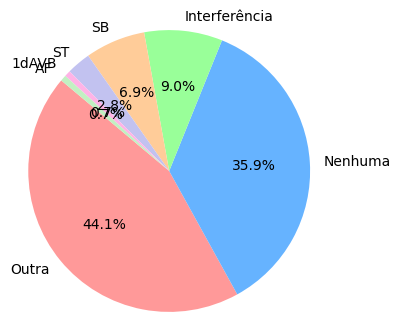

In [9]:
import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = ['Outra', 'Nenhuma', 'Interferência', 'SB', 'ST', '1dAVB', 'AF']
sizes = [64, 52, 13, 10, 4, 1, 1]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2']  # Cores diferentes para cada segmento

# Criação do gráfico de pizza
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Para que o gráfico de pizza seja desenhado como um círculo

# Exibindo o gráfico
plt.show()


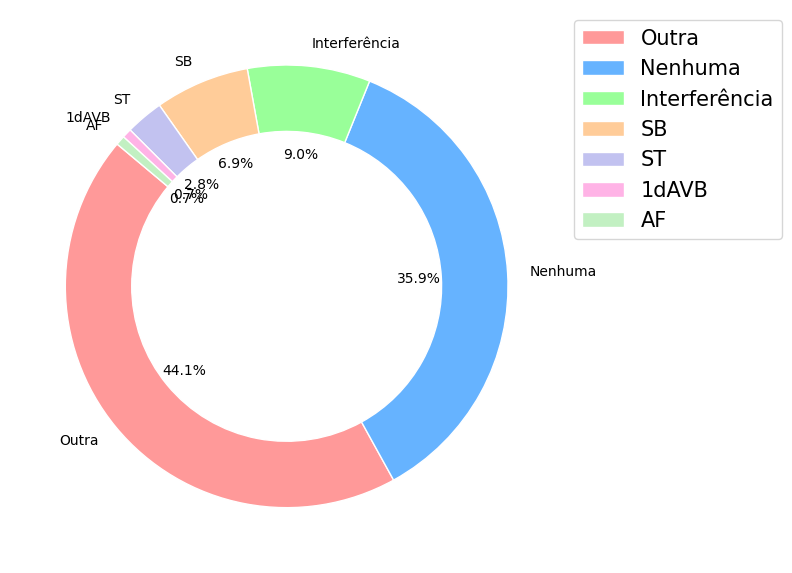

In [10]:
import matplotlib.pyplot as plt

# Dados para o gráfico de pizza
labels = ['Outra', 'Nenhuma', 'Interferência', 'SB', 'ST', '1dAVB', 'AF']
sizes = [64, 52, 13, 10, 4, 1, 1]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2']  # Cores diferentes para cada segmento

# Criação do gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.3, edgecolor='w')  # Adiciona uma borda branca aos segmentos
)

# Adicionar uma legenda
plt.legend(labels, loc='best', fontsize=15, bbox_to_anchor=(1, 1))

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibindo o gráfico
plt.show()
